<a href="https://colab.research.google.com/github/RuchiraAbeywardhane/A03-Neural-Networks/blob/main/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Q01**

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.optim as optim

Files already downloaded and verified
Files already downloaded and verified
Epoch 1/10, Loss: 2.0811
Epoch 2/10, Loss: 1.9100
Epoch 3/10, Loss: 1.8466
Epoch 4/10, Loss: 1.8079
Epoch 5/10, Loss: 1.7793
Epoch 6/10, Loss: 1.7580
Epoch 7/10, Loss: 1.7405
Epoch 8/10, Loss: 1.7259
Epoch 9/10, Loss: 1.7127
Epoch 10/10, Loss: 1.7013


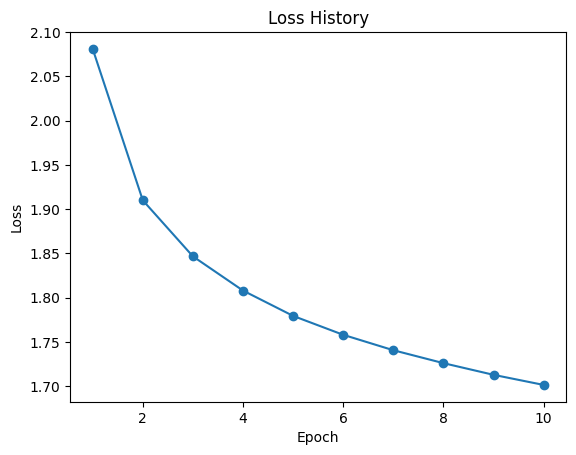

Training Accuracy: 41.21%
Test Accuracy: 40.71%


In [5]:
if __name__ == '__main__':
    # 1. Dataloading
    transform = transforms.Compose(
        [
            transforms.ToTensor(),
            transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
        ]
    )
    batch_size = 50
    trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
    testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
    testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

    classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

    # 2. Define Network Architecture
    class SimpleNet(nn.Module):
        def __init__(self, input_size, hidden_size, output_size):
            super(SimpleNet, self).__init__()
            # Define layers
            self.fc1 = nn.Linear(input_size, hidden_size)
            self.sigmoid = nn.Sigmoid()
            self.fc2 = nn.Linear(hidden_size, output_size)

        def forward(self, x):
            x = x.view(x.size(0), -1)  # Flatten input
            x = self.fc1(x)  # First layer
            x = self.sigmoid(x)  # Sigmoid activation
            x = self.fc2(x)  # Output layer
            return x

    # Model parameters
    input_size = 3 * 32 * 32  # CIFAR-10 image size (flattened)
    hidden_size = 100  # Hidden layer size
    output_size = 10  # Number of classes

    # Instantiate model, loss function, and optimizer
    model = SimpleNet(input_size, hidden_size, output_size)
    criterion = nn.CrossEntropyLoss()  # Cross-entropy loss for classification
    optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=0.0005)  # Weight decay for L2 regularization

    # 3. Training Loop
    num_epochs = 10
    loss_history = []

    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs, labels in trainloader:
            # Zero gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Backward pass and optimization
            loss.backward()
            optimizer.step()

            # Accumulate loss
            running_loss += loss.item()

        # Average loss for the epoch
        epoch_loss = running_loss / len(trainloader)
        loss_history.append(epoch_loss)
        print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {epoch_loss:.4f}")

    # 4. Plotting the Loss History
    plt.plot(range(1, num_epochs + 1), loss_history, marker='o')
    plt.title("Loss History")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.show()

    # 5. Calculate Training Accuracy
    correct_train = 0
    total_train = 0
    with torch.no_grad():
        for inputs, labels in trainloader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()
    train_acc = 100 * correct_train / total_train
    print(f"Training Accuracy: {train_acc:.2f}%")

    # 6. Calculate Test Accuracy
    correct_test = 0
    total_test = 0
    with torch.no_grad():
        for inputs, labels in testloader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()
    test_acc = 100 * correct_test / total_test
    print(f"Test Accuracy: {test_acc:.2f}%")

# **Q02**

Epoch 1: Train Loss = 0.4138, Train Accuracy = 87.14%
Epoch 2: Train Loss = 0.0836, Train Accuracy = 97.44%
Epoch 3: Train Loss = 0.0564, Train Accuracy = 98.26%
Epoch 4: Train Loss = 0.0448, Train Accuracy = 98.61%
Epoch 5: Train Loss = 0.0357, Train Accuracy = 98.88%
Epoch 6: Train Loss = 0.0291, Train Accuracy = 99.09%
Epoch 7: Train Loss = 0.0255, Train Accuracy = 99.20%
Epoch 8: Train Loss = 0.0209, Train Accuracy = 99.32%
Epoch 9: Train Loss = 0.0187, Train Accuracy = 99.38%
Epoch 10: Train Loss = 0.0172, Train Accuracy = 99.44%
Test Accuracy: 98.96%


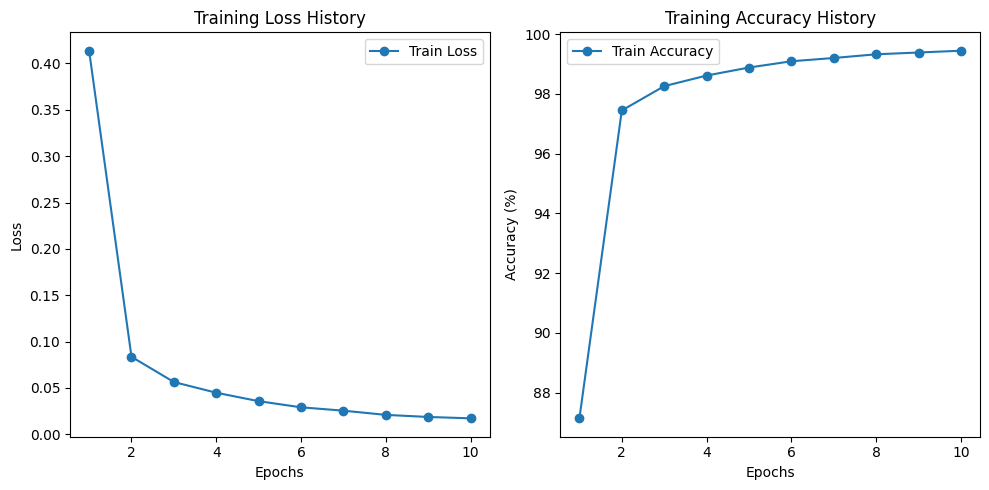

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# Define LeNet-5 Model
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5)     # Input channels: 1, Output channels: 6
        self.pool = nn.AvgPool2d(2, stride=2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)    # Input channels: 6, Output channels: 16
        self.fc1 = nn.Linear(16 * 5 * 5, 120)           # Adjust input features based on image size
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)                    # 10 classes for MNIST

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))        # Convolution + Pooling Layer 1
        x = self.pool(torch.relu(self.conv2(x)))        # Convolution + Pooling Layer 2
        x = x.view(-1, 16 * 5 * 5)                      # Flatten the features for the fully connected layers
        x = torch.relu(self.fc1(x))                     # Fully Connected Layer 1
        x = torch.relu(self.fc2(x))                     # Fully Connected Layer 2
        x = self.fc3(x)                                 # Output Layer (logits for 10 classes)
        return x

# Transformations
transform = transforms.Compose([
    transforms.Resize((32, 32)),                        # LeNet-5 expects 32x32 images
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))          # Normalize using MNIST mean and std
])

# Load MNIST Dataset
train_dataset = datasets.MNIST('.', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST('.', train=False, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1000, shuffle=False)

# Initialize Model, Loss Function, Optimizer
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = LeNet5().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# Training Function
def train(model, loader, optimizer, criterion, device):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for data, target in loader:
        data, target = data.to(device), target.to(device)

        optimizer.zero_grad()
        outputs = model(data)
        loss = criterion(outputs, target)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

    accuracy = 100 * correct / total
    avg_loss = running_loss / len(loader)
    return avg_loss, accuracy

# Testing Function
def test(model, loader, device):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for data, target in loader:
            data, target = data.to(device), target.to(device)
            outputs = model(data)
            _, predicted = torch.max(outputs.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()

    accuracy = 100 * correct / total
    return accuracy

# Training Loop
train_losses = []
train_accuracies = []
for epoch in range(1, 11):
    train_loss, train_accuracy = train(model, train_loader, optimizer, criterion, device)
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    print(f"Epoch {epoch}: Train Loss = {train_loss:.4f}, Train Accuracy = {train_accuracy:.2f}%")

# Test Model
test_accuracy = test(model, test_loader, device)
print(f"Test Accuracy: {test_accuracy:.2f}%")

# Plot Accuracy and Loss History
epochs = list(range(1, 11))

# Plot Training Loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Train Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss History')
plt.legend()

# Plot Training Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, label='Train Accuracy', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Training Accuracy History')
plt.legend()

plt.tight_layout()
plt.show()


# **Q03**